In [52]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

In [2]:
# df_us 
df_us = df[df["job_country"].isin(["United States"])].copy()

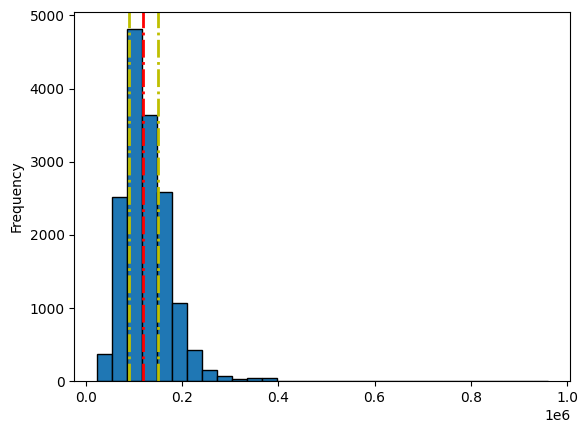

In [3]:
q1 = df_us["salary_year_avg"].quantile(0.25)
q2 = df_us["salary_year_avg"].quantile(0.50)
q3 = df_us["salary_year_avg"].quantile(0.75)

ax = df_us.loc[:,"salary_year_avg"].dropna().plot(kind="hist", bins=30, edgecolor='black')
ax.axvline(x=q2, color="r", ls="-.", lw=2)
ax.axvline(x=q1, color="y", ls="-.", lw=2)
ax.axvline(x=q3, color="y", ls="-.", lw=2)
# ax.axvline(x=q1-, color="y", ls="-.", lw=2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 400000.0)

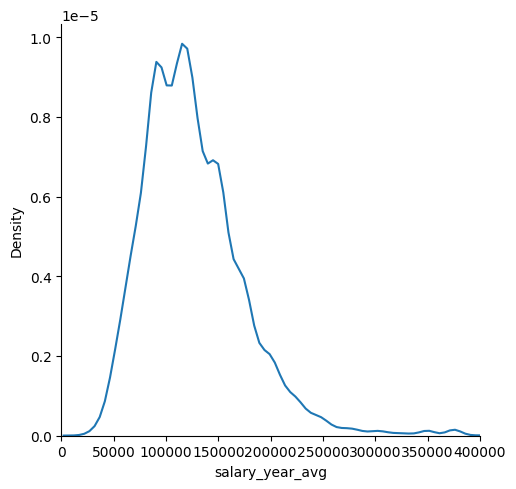

In [60]:
# df_us.loc[:,"salary_year_avg"].dropna().plot(kind="hist", bins=30, edgecolor='black')
# df_us['salary_year_avg'].replace([np.inf, -np.inf], np.nan, inplace=True)
sns.displot(data=df_us, x="salary_year_avg", kind="kde" )
plt.xlim(0,400000)

# Box Plot

In [4]:
titles = df_us.job_title_short.value_counts().head(3).index.to_list()
titles

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [5]:
df_us_boxplot = df_us[df_us["job_title_short"].isin(titles)].dropna(subset=["salary_year_avg"])

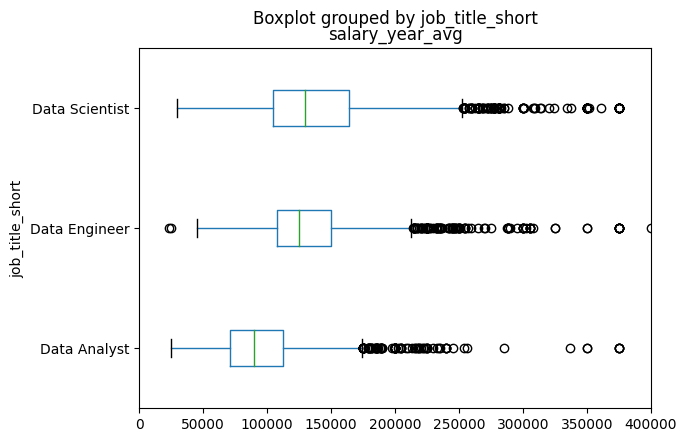

In [6]:
fig, ax = plt.subplots()
df_us_boxplot.boxplot(column="salary_year_avg", by="job_title_short", vert=False, grid=False, ax=ax)
ax.set_xlim(left=0,right=400000)
# plt.xlim([0,0.8])
plt.show()

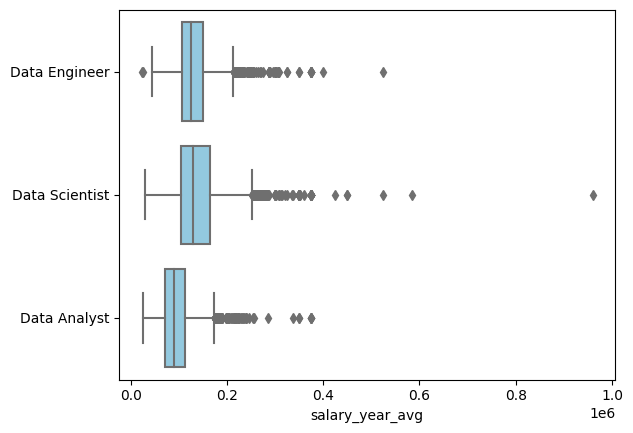

In [77]:
sns.boxplot(data=df_us_boxplot, x="salary_year_avg", y="job_title_short", color='skyblue')
plt.ylabel("")
plt.show()

# Top paing skills and Top in demand skills

In [7]:
df_us_new = df_us[["job_skills", "salary_year_avg"]].dropna(subset=["salary_year_avg"]).copy()

In [8]:
df_us_new = df_us_new.explode(column="job_skills")

In [9]:
df_us_new_gb = df_us_new.groupby(by="job_skills")["salary_year_avg"].agg(["count", "median"])

In [25]:
df_skill_in_demand = df_us_new_gb.sort_values(by="count", ascending=False)
df_skill_in_demand = df_skill_in_demand.head(10)
df_skill_in_demand = df_skill_in_demand.sort_values(by="median", ascending=False)

In [21]:
df_skill_with_most_pay = df_us_new_gb.sort_values(by="median", ascending=False)
df_skill_with_most_pay = df_skill_with_most_pay.head(10)
df_skill_with_most_pay = df_skill_with_most_pay.sort_values(by="median", ascending=False)
df_skill_with_most_pay

,count,median
job_skills,,
haskell,1,213000.00000
ruby on rails,10,187750.00000
ringcentral,2,182500.00000
solidity,6,177000.00000
elixir,2,175610.34375
mongo,188,173500.00000
dplyr,15,167500.00000
vue,8,167423.50000
unreal,8,166183.50000


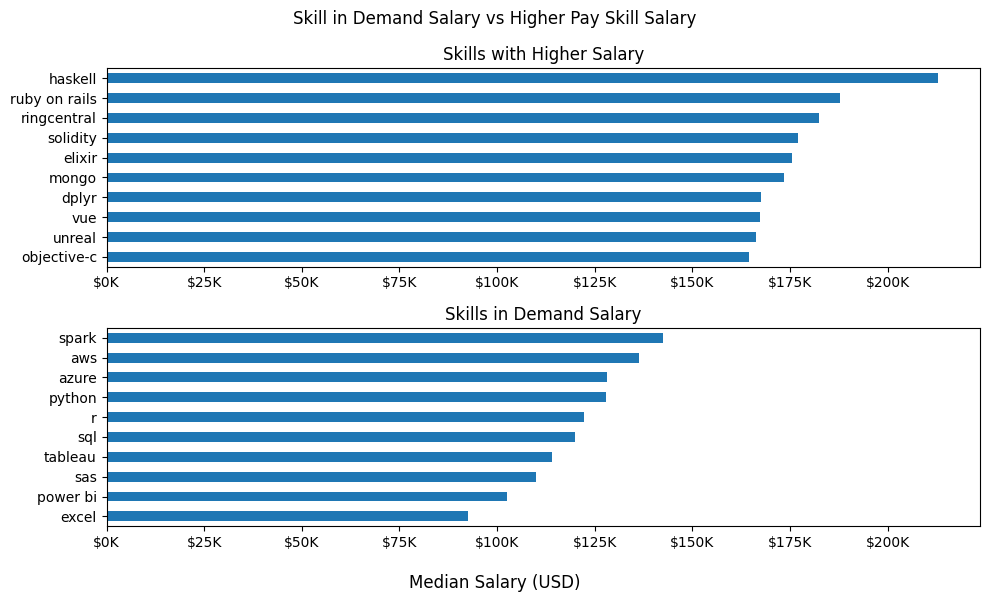

In [41]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
df_skill_with_most_pay[::-1]["median"].plot(kind="barh", ax=ax[0], title="Skills with Higher Salary")
df_skill_in_demand[::-1]["median"].plot(kind="barh", ax=ax[1], title="Skills in Demand Salary")
ax[1].set_xlim(ax[0].get_xlim())
ax[0].xaxis.set_major_formatter(lambda x,pos:f'${(x/1000):,.0f}K')
ax[1].xaxis.set_major_formatter(lambda x,pos:f'${(x/1000):,.0f}K')
ax[0].set_ylabel("")
ax[1].set_ylabel("")
fig.suptitle("Skill in Demand Salary vs Higher Pay Skill Salary")
fig.supxlabel("Median Salary (USD)")
fig.tight_layout()
plt.show()

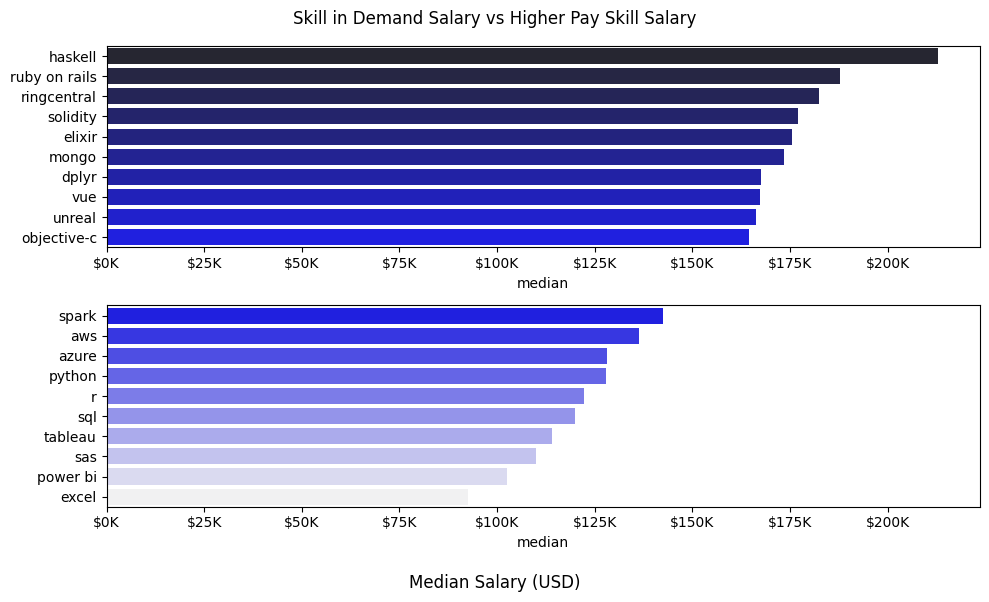

In [49]:
fig, ax = plt.subplots(2,1, figsize=(10,6))

sns.barplot(data=df_skill_with_most_pay, x="median", y=df_skill_with_most_pay.index, palette="dark:b", ax=ax[0])
sns.barplot(data=df_skill_in_demand, x="median", y=df_skill_in_demand.index,palette="light:b_r", ax=ax[1])

# df_skill_with_most_pay[::-1]["median"].plot(kind="barh", ax=ax[0], title="Skills with Higher Salary")
# df_skill_in_demand[::-1]["median"].plot(kind="barh", ax=ax[1], title="Skills in Demand Salary")

ax[1].set_xlim(ax[0].get_xlim())
ax[0].xaxis.set_major_formatter(lambda x,pos:f'${(x/1000):,.0f}K')
ax[1].xaxis.set_major_formatter(lambda x,pos:f'${(x/1000):,.0f}K')
ax[0].set_ylabel("")
ax[1].set_ylabel("")

fig.suptitle("Skill in Demand Salary vs Higher Pay Skill Salary")
fig.supxlabel("Median Salary (USD)")
fig.tight_layout()
plt.show()